# Analyze data distribution with CLUSTERING : K-means vs. Hierarchical Agglomerative Clustering (HAC) 

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris**

### Imports


In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Loading toy datasets from files

In [2]:
# Get data
def get_data(data_path):
    data = []
    with open(data_path, 'r') as file:
        for num, line in enumerate(file):
            if num >= 4:
                line_sep = line.strip('\n').split(sep='\t')
                single_example = [float(element) for element in line_sep][1:]
                data.append(single_example)

    return np.array(data)

In [3]:
data_atom = get_data('./clustering-examples/Atom.lrn')
data_lsun = get_data('./clustering-examples/Lsun.lrn')
data_wingnut = get_data('./clustering-examples/WingNut.lrn')
data_chainlink = get_data('./clustering-examples/Chainlink.lrn')
data_twodiamonds = get_data('./clustering-examples/TwoDiamonds.lrn')

### Visualizing datasets

In [4]:
def data_show(data):
    num_dim = data.shape[1]
        
    # Show
    fig = plt.figure()
    if num_dim == 2:
        plt.scatter(data[:, 0], data[:, 1])
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
    plt.show()

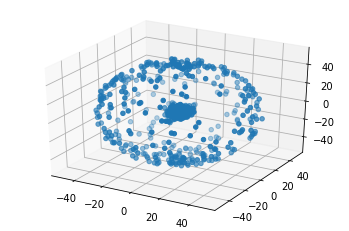

In [5]:
data_show(data_atom)

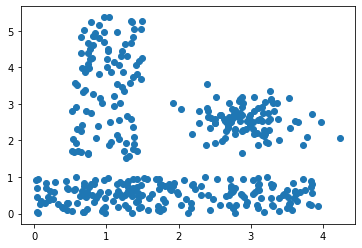

In [6]:
data_show(data_lsun)

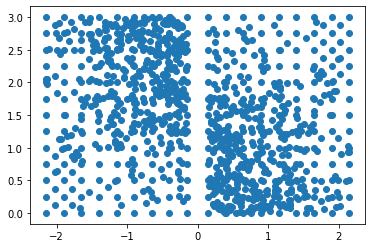

In [7]:
data_show(data_wingnut)

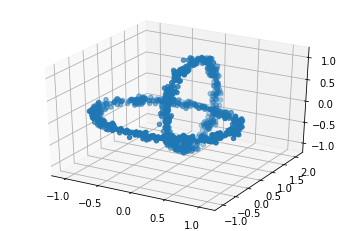

In [8]:
data_show(data_chainlink)

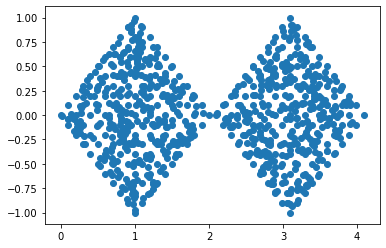

In [9]:
data_show(data_twodiamonds)

## 1. K-means

**Test the K-means clustering method, implemented in SciKit-Learn by the class sklearn.cluster.KMeans.**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Then experiment K-means on each of the 5 datasets, and with several values for K**

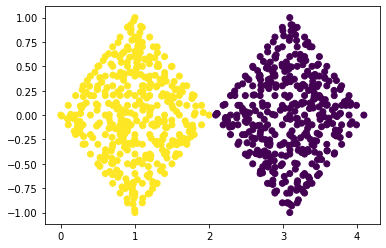

In [69]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(data_twodiamonds)

plt.scatter(data_twodiamonds[:, 0], data_twodiamonds[:, 1], c=y_pred)


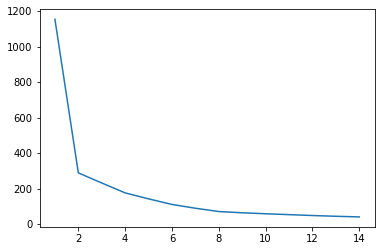

In [75]:
liste= np.arange(1, 15)
sq_dist = []
for k in liste:
    km = KMeans(n_clusters=k)
    y_pred = km.fit_predict(data_twodiamonds)
    sq_dist.append(km.inertia_)

plt.plot(liste,sq_dist)

In [39]:
km.cluster_centers_

array([[-0.91993904,  1.94602578],
       [ 0.91993904,  1.05397423]])

#### QUESTION 1: Does the K-means algo always produce the expected result?


#### QUESTION 2: What is the only shape of cluster that K-means is capable of isolating?

In [ ]:
two_diamonds

## 2. Agglomerative Clustering

**Now, test the Hierarchical Agglomerative Clustering, implemented in SciKit-Learn by the class sklearn.cluster.AgglomerativeClustering**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

**Then experiment Agglomerative Clustering on each of the 5 datasets, with either single-linkage or complete-linkage, and with several values for the requested number of clusters**

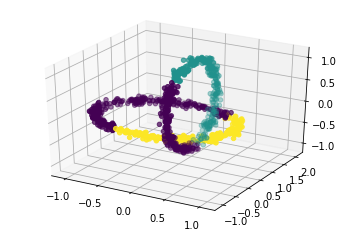

In [96]:
y_pred = AgglomerativeClustering(n_clusters = 3).fit_predict(data_chainlink)

ax = plt.axes(projection='3d')
ax.scatter3D(data_chainlink[:, 0], data_chainlink[:, 1], data_chainlink[:, 2], c=y_pred)

In [77]:
def data_show_b(data, b):
    num_dim = data.shape[1]
        
    # Show
    fig = plt.figure()
    if num_dim == 2:
        plt.scatter(data[:, 0], data[:, 1], c=b)
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2], c=b)
    plt.show()

In [94]:
def HAC(data, linkage='single'):
    y_pred = AgglomerativeClustering(linkage=linkage).fit_predict(data)
    data_show_b(data, y_pred)

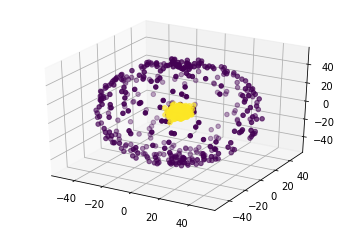

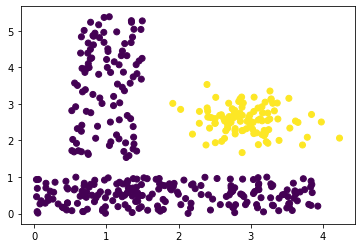

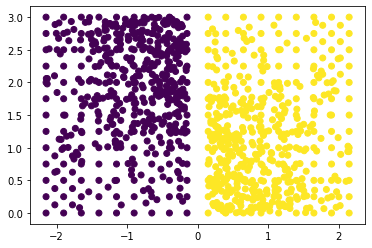

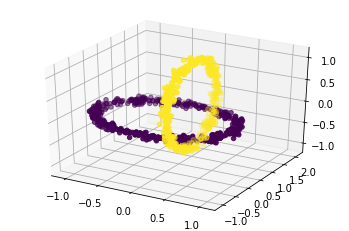

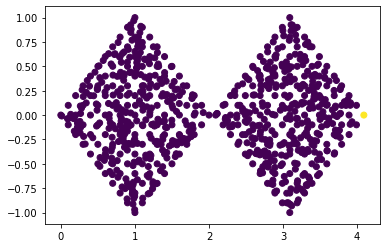

In [95]:
HAC(data_atom)
HAC(data_lsun)
HAC(data_wingnut)
HAC(data_chainlink)
HAC(data_twodiamonds)

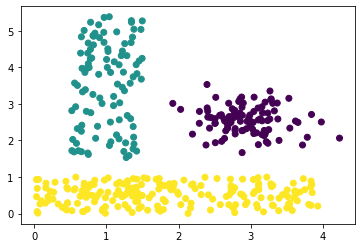

In [97]:
y_pred = AgglomerativeClustering(n_clusters = 3, linkage='single').fit_predict(data_lsun)
data_show_b(data_lsun, y_pred)

#### QUESTION 3: On which dataset does "single-linkage" HAC produce an excellent result? Why is it logical?


#### QUESTION 4: Conversely, on which dataset does "single-linkage" HAC perform very BADLY, and why is it expected?


#### QUESTION 5: By comparing with what you had observed for K-means, which variant of HAC (between single-linkage and complete-linkage) seems to be the most complementary to K-means?


### To learn more about OTHER clustering methods (such as Spectral Clustering) implemented in SciKit-Learn, you can look at the following page: https://scikit-learn.org/stable/modules/clustering.html

## 3. Now experiment clustering on a more realistics dataset: the Digits Dataset https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [76]:
#Load the digits dataset
digits = datasets.load_digits()

### The goal is to check if the 10 classes correspond or not to separate clusters in input space
**Therefore, you should perform clustering, with 10 or more clusters (as one class could correspond to more than one cluster), on the dataset WITHOUT USING LABELS**
**Then, you should analyze the distribution of labels of examples in each of the obtained clusters, in order to measure how homogeneous in terms of labels is each cluster, and check if it is possible to obtain a one-to-one (or one-to-few) correspondance between classes and clusters.**

In [101]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])